Prashun Kafle

## PROJECT 1

# Task

For this project, I wanted to explore something that I care about and have a personal interest in: aviation. I often wonder what types of aircraft can physically land in varying weather conditions. My goal for this project is to use real-time weather data from the Sioux Falls Regional Airport (FSD) to determine whether small aircraft—such as a Cessna 172—can safely land under different environmental conditions.

***This analysis uses hourly weather data (wind gusts, visibility, snowfall, cloud cover, and rain) gathered from the Open-Meteo API. The results show how changing weather factors can affect flight feasibility for small planes based on their performance limits.***

# Data Dictionary

#### Purpose
Weather conditions for Sioux Falls Regional Airport (FSD) to check whether small aircrafts can land safely within given time periods.

#### Source
Open-Meteo Forecast API (Hourly Data). 
Parameters used to fetch the data: 
latitude=43.5814, longitude=96.7417, timezone=auto, windspeed_unit=kn

#### Coverage
Past 5 days + next 16 days (per API call)

#### Primary Key
Time (Local)

#### Fields from the API after renaming
| Field | Description | Unit | Type | Example |
|--------|--------------|-------|------------|----------|
| Time | Timestamp of the weather reading | ISO 8601 | datetime | 2025-10-19 14:00 |
| Wind Gusts | Peak gust at 10 m above ground | knots(kt) | float | 18.7 |
| Snowfall | Amount of snow in that hour | cm | float | 0.0 |
| Cloud Cover | Fraction of sky covered by clouds | % | float | 45 |
| Visibility | Horizontal visibility distance | meters | float | 25000 |
| Wind Direction | Direction of where the wind is coming from | degrees(0-360) | int | 273 | 
| Rain | Hourly rainfall | mm | float | 0.2 |
| Wind Speed | Mean wind speed at 10 m above ground | knots(kt) | float | 16.3 |
| Temperature | Air temperature 80 m above ground | F | float | 45.32 |
| Cessna 172 (Aircraft Name in general) | Flight classification based on thresholds | category | string | Safe to fly / Warning / No Fly |



# Data Analysis

In [34]:
import requests
import pandas as pd 
import matplotlib.pyplot as plt
url = "https://api.open-meteo.com/v1/forecast?latitude=43.5814&longitude=-96.7417&hourly=temperature_2m,rain,wind_gusts_10m,visibility,cloud_cover,snowfall,wind_speed_10m,wind_direction_10m&timezone=auto&forecast_days=1&wind_speed_unit=kn&temperature_unit=fahrenheit"
resp = requests.get(url)
resp 
data = resp.json()
hourlydata = data["hourly"]
df = pd.DataFrame(hourlydata)
df = df.rename(columns={
    "time": "Time",
    "temperature_2m": "Temperature",
    "rain": "Rain",
    "wind_gusts_10m": "Wind Gusts",
    "visibility": "Visibility",
    "cloud_cover": "Cloud Cover",
    "snowfall": "Snowfall",
    "wind_speed_10m": "Wind Speed",
    "wind_direction_10m": "Wind Direction"
})
df["Time"] = pd.to_datetime(df["Time"])
df

,Time,Temperature,Rain,Wind Gusts,Visibility,Cloud Cover,Snowfall,Wind Speed,Wind Direction
0,2025-10-19 00:00:00,42.8,0.0,17.9,25800.0,0,0.0,10.5,293
1,2025-10-19 01:00:00,41.7,0.0,16.5,23800.0,0,0.0,9.2,288
2,2025-10-19 02:00:00,40.9,0.0,17.7,23600.0,0,0.0,10.3,290
3,2025-10-19 03:00:00,40.3,0.0,17.3,25000.0,0,0.0,9.8,287
4,2025-10-19 04:00:00,39.5,0.0,18.5,24300.0,0,0.0,10.7,286
5,2025-10-19 05:00:00,39.2,0.0,16.5,23400.0,0,0.0,9.7,290
6,2025-10-19 06:00:00,38.3,0.0,15.4,22000.0,0,0.0,7.9,287
7,2025-10-19 07:00:00,37.4,0.0,15.2,21300.0,0,0.0,7.4,290
8,2025-10-19 08:00:00,36.5,0.0,14.2,20600.0,0,0.0,5.9,281
9,2025-10-19 09:00:00,39.9,0.0,16.5,22200.0,0,0.0,8.2,275


Wind Gusts Over the day (in knots) for 2025-10-19 00:00:00 to 2025-10-19 23:00:00:


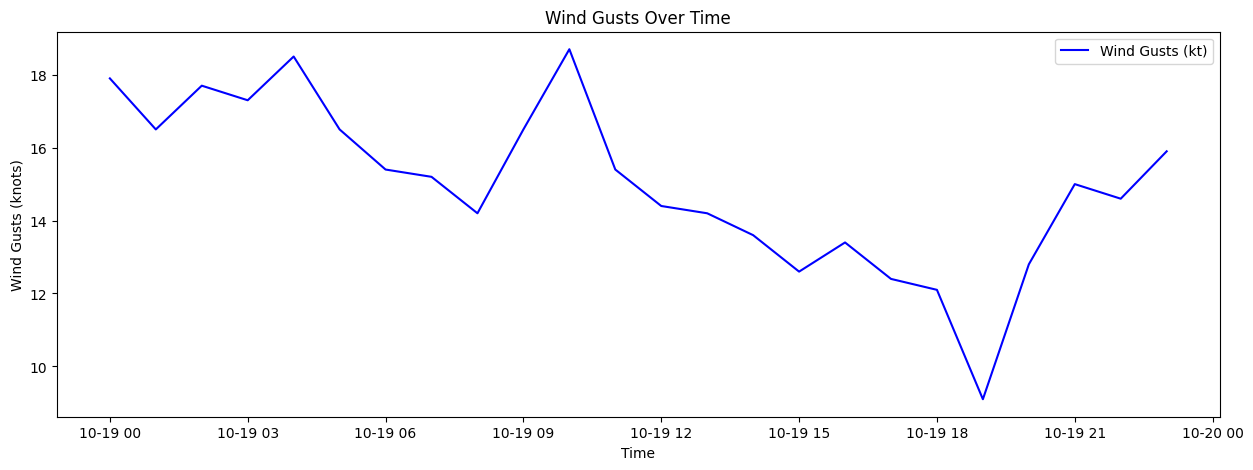

In [35]:
print(f"Wind Gusts Over the day (in knots) for {df['Time'].iloc[0]} to {df['Time'].iloc[-1]}:")
plt.figure(figsize=(15, 5))
plt.plot(df["Time"], df["Wind Gusts"], color="blue", label="Wind Gusts (kt)")
plt.xlabel("Time")
plt.ylabel("Wind Gusts (knots)")
plt.title("Wind Gusts Over Time")
plt.legend()
plt.show()

In [36]:
def flight_conditions(df,name="Aircraft",windwarning=17,noflywind=20,snowlimit=0,cloudlimit=5,visibilitylimit=0,rainlimit=0):
    result = df.copy()
    result[name] = "Safe to fly"
    # Checking conditions
    result.loc[result["Wind Gusts"] > noflywind, name] = "NO FLY"
    result.loc[(result["Wind Gusts"] > windwarning) &(result["Wind Gusts"] <= noflywind), name] = "WARNING: Difficult "
    result.loc[result["Snowfall"]> snowlimit, name] = "NO FLY"
    result.loc[result["Cloud Cover"] > cloudlimit, name] = "NO FLY"
    result.loc[result["Visibility"] < visibilitylimit, name]= "NO FLY"
    result.loc[result["Rain"] > rainlimit, name] ="NO FLY"
    # Returning the columns that matter
    return result[["Wind Gusts", "Snowfall", "Cloud Cover", "Visibility", "Rain", name]]

In [37]:
cessca_df = flight_conditions(df, name="Cessna 172", windwarning=17, noflywind=20, snowlimit=0, cloudlimit=5, visibilitylimit=5000, rainlimit=0)
cessca_df

,Wind Gusts,Snowfall,Cloud Cover,Visibility,Rain,Cessna 172
0,17.9,0.0,0,25800.0,0.0,WARNING: Difficult
1,16.5,0.0,0,23800.0,0.0,Safe to fly
2,17.7,0.0,0,23600.0,0.0,WARNING: Difficult
3,17.3,0.0,0,25000.0,0.0,WARNING: Difficult
4,18.5,0.0,0,24300.0,0.0,WARNING: Difficult
5,16.5,0.0,0,23400.0,0.0,Safe to fly
6,15.4,0.0,0,22000.0,0.0,Safe to fly
7,15.2,0.0,0,21300.0,0.0,Safe to fly
8,14.2,0.0,0,20600.0,0.0,Safe to fly
9,16.5,0.0,0,22200.0,0.0,Safe to fly


In [38]:
schweizer_sgs_223_df = flight_conditions(df, name="Schweizer SGS 2-33", windwarning=15, noflywind=18, snowlimit=0, cloudlimit=3, visibilitylimit=5, rainlimit=0)
schweizer_sgs_223_df

,Wind Gusts,Snowfall,Cloud Cover,Visibility,Rain,Schweizer SGS 2-33
0,17.9,0.0,0,25800.0,0.0,WARNING: Difficult
1,16.5,0.0,0,23800.0,0.0,WARNING: Difficult
2,17.7,0.0,0,23600.0,0.0,WARNING: Difficult
3,17.3,0.0,0,25000.0,0.0,WARNING: Difficult
4,18.5,0.0,0,24300.0,0.0,NO FLY
5,16.5,0.0,0,23400.0,0.0,WARNING: Difficult
6,15.4,0.0,0,22000.0,0.0,WARNING: Difficult
7,15.2,0.0,0,21300.0,0.0,WARNING: Difficult
8,14.2,0.0,0,20600.0,0.0,Safe to fly
9,16.5,0.0,0,22200.0,0.0,WARNING: Difficult


# Conclusion

This project's objective was to use hourly meteorological data to investigate the viability of small aircraft landing at Sioux Falls Regional Airport (FSD). Based on wind, visibility, and precipitation, the previously mentioned analysis allows us to determine the times of day when certain aircraft types are safe to land. Due to their sensitivity to severe wind gusts, aircraft like the Schweizer SGS 2-33 glider demonstrated fewer landing opportunities, but the Cessna 172 was able to operate safely for the majority of the day with only a few "NO FLY" intervals.

This comparison shows how weather variability and aircraft performance limitations have a direct impact on flight safety and decision-making. To increase accuracy, future studies might incorporate more aircraft types or extra meteorological factors, including crosswind or peak height data.
